AUIDANCE RATING PREDECTION


In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/Dine-crypto/ml_project/refs/heads/main/converted_data_11%20-%20converted_data.csv')
data

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,6,752,90.0,0,86,140,64.0
1,6,860,118.0,1,68,22,53.0
2,2,689,95.0,0,100,51,97.0
3,0,286,127.0,1,89,27,74.0
4,4,160,109.0,2,8,148,37.0
...,...,...,...,...,...,...,...
16629,6,987,104.0,2,56,9,74.0
16630,3,15,108.0,0,97,279,92.0
16631,2,59,142.0,1,78,9,87.0
16632,3,689,139.0,1,95,21,91.0


In [37]:
data.loc[:, 'rating'] = pd.to_numeric(data['rating'], errors='coerce')
data.loc[:, 'tomatometer_status'] = pd.to_numeric(data['tomatometer_status'], errors='coerce')


In [19]:
data = data.dropna()


In [21]:
X = data.drop(['audience_rating', 'genre'], axis=1)
y = data['audience_rating']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [33]:
print(y_lr_train_pred, y_lr_test_pred)

[71.68025329 86.09173582 73.11747816 ... 40.01222718 52.40619104
 46.04285786] [73.37912128 53.84383774 81.47222906 ... 75.02613162 70.9775725
 61.67146835]


In [35]:
y_lr_test_pred

array([73.37912128, 53.84383774, 81.47222906, ..., 75.02613162,
       70.9775725 , 61.67146835])

evaluate model performance:

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [41]:
lr_train_mse

221.6123264284635

In [43]:
lr_train_r2

0.46923210331659526

In [45]:
lr_test_mse

250.36057454796756

In [47]:
lr_test_r2

0.40337453822240155

In [49]:
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Train):',lr_train_r2)
print('LR MSE (Test):',lr_test_mse)
print('LR R2 (Test):',lr_test_r2)

LR MSE (Train): 221.6123264284635
LR R2 (Train): 0.46923210331659526
LR MSE (Test): 250.36057454796756
LR R2 (Test): 0.40337453822240155


In [63]:
lr_results= pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['method','Training MSE','TrainingR2','Test MSE','Test R2']

In [65]:
lr_results

,method,Training MSE,TrainingR2,Test MSE,Test R2
0,Linear Regression,221.612326,0.469232,250.360575,0.403375


RANDOM FOREST TRAINING MODEL:

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

Applying to make predection:

In [69]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

Evaluate Model Performance:


In [71]:
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [89]:
rf_results= pd.DataFrame(['Linear Regression',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','TrainingR2','Test MSE','Test R2']
lr_results

,method,Training MSE,TrainingR2,Test MSE,Test R2
0,Linear Regression,221.612326,0.469232,250.360575,0.403375


Model Comparision

In [87]:
df_models = pd.concat([lr_results,rf_results],axis=0).reset_index(drop=True)
df_models

,method,Training MSE,TrainingR2,Test MSE,Test R2,Method
0,Linear Regression,221.612326,0.469232,250.360575,0.403375,NaN
1,NaN,235.963336,0.434861,237.342333,0.434398,Linear Regression


In [83]:
df_models.reset_index(drop=True)

,method,Training MSE,TrainingR2,Test MSE,Test R2
0,Linear Regression,221.612326,0.469232,250.360575,0.403375
1,Linear Regression,235.963336,0.434861,237.342333,0.434398


Data Vizulation of Prediction Result

Text(0.5, 0, 'genre')

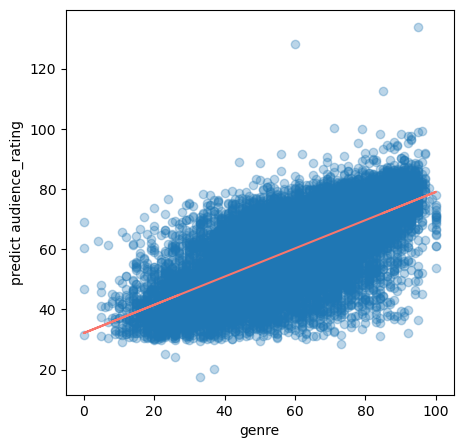

In [107]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_pred,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred,1)
p = np.poly1d(z)


plt.plot(y_train,p(y_train), '#F8766D')
plt.ylabel('predict audience_rating')
plt.xlabel('genre')